### change path below to your gdrive path where folder is 

In [1]:
cd '/content/drive/MyDrive/pavement_competition'

/content/drive/MyDrive/pavement_competition/test


In [3]:
## Uncomment the lines below to download training data
# !gdown 'https://drive.google.com/uc?id=1I1onAA61iui4LjOxejkxioaBjU1Ic_6X'
# !unzip 'training_data.zip' -d '../cvat'

In [ ]:
# cvat folder should contain 3 folders: td1, td2, td3
!ls cvat 

## Uncomment and run codes below if this is the first time running this notebook

In [ ]:
# !pip install -U PyYAML

In [4]:
# !pip install -qr dspYolov5/requirements.txt  # install dependencies for yolov5

## Uncomment block of codes in cell below to convert cvat annotations to yolo annotations

In [ ]:
import os
from dsps.simple_fxn import cvat2yolo
# location of cvat annotations
annotation_folder = 'cvat/'
output_path = 'data/training'
val_path = 'data/validation'
for annts in os.listdir(annotation_folder):
  json_file = os.path.join(annotation_folder,annts,'annotations','instances_default.json')
  img_path = os.path.join(annotation_folder,annts,'images')
  if(os.path.isfile(json_file)):
    cvat2yolo(annts,json_file,img_path, output_path, val_path)

{1: 'ALLIGATOR', 2: 'BLOCK', 3: 'TRANSVERSE', 4: 'PATCHING', 5: 'SEALING', 6: 'LONGITUDINAL', 7: 'MANHOLE'}
total number of classes: 7
['PATCHING', 'LONGITUDINAL', 'TRANSVERSE', 'SEALING', 'ALLIGATOR', 'BLOCK']
{1: 'ALLIGATOR', 2: 'BLOCK', 3: 'TRANSVERSE', 4: 'PATCHING', 5: 'SEALING', 6: 'LONGITUDINAL', 7: 'MANHOLE'}
total number of classes: 7
['LONGITUDINAL', 'ALLIGATOR', 'PATCHING', 'BLOCK', 'SEALING', 'TRANSVERSE', 'MANHOLE']
{1: 'ALLIGATOR', 2: 'BLOCK', 3: 'TRANSVERSE', 4: 'PATCHING', 5: 'SEALING', 6: 'LONGITUDINAL', 7: 'MANHOLE'}
total number of classes: 7
['LONGITUDINAL', 'TRANSVERSE', 'BLOCK', 'ALLIGATOR', 'PATCHING', 'SEALING']


## Train a new model

### If not running on GPU, change runtime to GPU
________

In [ ]:
import json
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.0+cu111 (Tesla P100-PCIE-16GB)


### **Change class labels and number of classes**: 
* Edit dspYolov5/data/dsps.yaml file 
### **Change model configuration**: 
* Edit dspYolov5/models/dsps_model.yaml

### run the code below. You may get an error the first time. 

---

restart the runtime and run again. 

stop cell after total epoch have elapsed. 

In [ ]:
!python -i dspYolov5/train_dsps.py --data dspYolov5/data/dsps.yaml --cfg dspYolov5/models/dsps_model.yaml --batch-size 8 --device 0

100% 755k/755k [00:00<00:00, 32.7MB/s]
train: weights=yolov5s.pt, cfg=dspYolov5/models/dsps_model.yaml, data=dspYolov5/data/dsps.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=weights/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v5.0-430-gaa18599 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0,

In [ ]:
# %run -i yolov5/train_dsps.py --data data/dsps.yaml --cfg models/dsps_model.yaml --batch-size 8 --device 0

### Evaluate and Visualize Model Performance
#### change weights path in the following cell: replace exp12 in the weights path with your corresponding folder-- 'weights/train/exp12/weights/best.pt'

In [ ]:
# !python 'dspYolov5/detect_dsps.py' --weights 'weights/train/exp/weights/best.pt' --img 640 --conf 0.25 --source data/test_images/
!python 'dspYolov5/detect_dsps.py' --weights 'weights/train/exp12/weights/best.pt' --img 640 --conf 0.25 --source data/test_images/

detect: weights=['weights/train/exp12/weights/best.pt'], source=data/test_images/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
requirements: /content/drive/MyDrive/pavement_competition/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-430-gaa18599 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 224 layers, 7070092 parameters, 0 gr

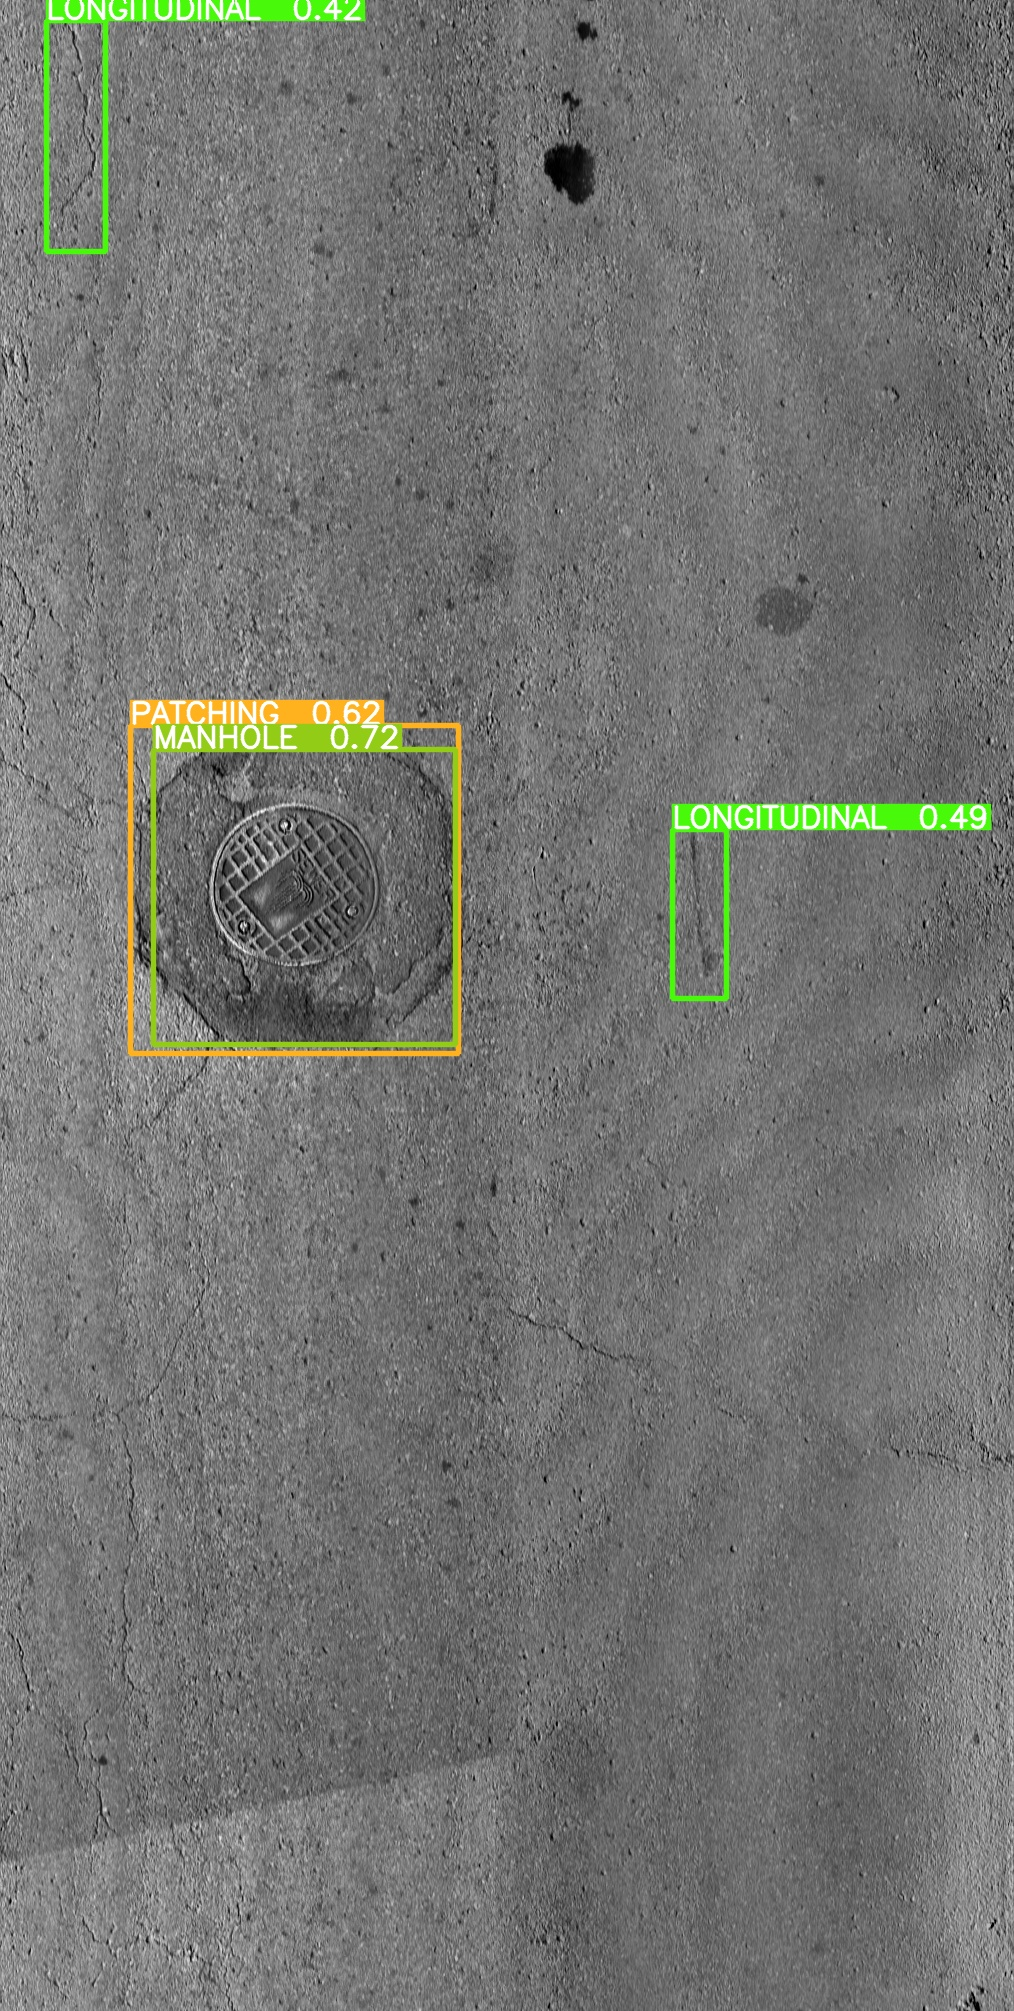

In [ ]:
Image(filename='results/images/0 (11).JPG', width=300)
# Image(filename='results/images/0 (1).JPG', width=300)

### Upload submission.json file in the "results" folder to leaderboard